In [1]:
import pandas as pd
import numpy as np

In [2]:
weather = pd.read_csv('C:/Users/Dell/OneDrive/ML Datasets/weather_data.csv')
weather.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No


In [3]:
y = weather['Play']
x = weather.drop(['Play'], axis = 1)

In [4]:
print('Shape of x is: {}'.format(x.shape))
print('Shape of y is: {}'.format(y.shape))

Shape of x is: (14, 4)
Shape of y is: (14,)


In [5]:
x_dummies = pd.get_dummies(x)
x_dummies

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,1,0
5,0,0,1,0,0,1,1,0,0,1
6,0,0,1,1,0,0,0,1,0,1
7,0,1,0,0,0,1,0,1,0,1
8,0,0,1,0,0,1,0,1,1,0
9,1,0,0,0,0,1,1,0,1,0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_dummies,y, test_size=0.3, random_state=0)

In [8]:
print(x_train.shape)
print(x_test.shape)

(9, 10)
(5, 10)


In [9]:
from sklearn.tree import DecisionTreeClassifier

#Default criterion is gini indicating gini impurity.
#Use 'entropy' if you want to use info gain from the split

clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x_dummies,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
y_pred = clf.predict(x_test)
y_pred

array(['Yes', 'Yes', 'No', 'No', 'Yes'], dtype=object)

In [11]:
y_test

8     Yes
6     Yes
4      No
11     No
2     Yes
Name: Play, dtype: object

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score

cnf = confusion_matrix(y_test, y_pred)
cnf

array([[2, 0],
       [0, 3]], dtype=int64)

In [13]:
cols = list(x_dummies.columns.values)
cols

['Outlook_Overcast',
 'Outlook_Rain',
 'Outlook_Sunny',
 'Temperature_Cool',
 'Temperature_Hot',
 'Temperature_Mild',
 'Humidity_High',
 'Humidity_Normal',
 'Wind_Strong',
 'Wind_Weak']

In [15]:
accuracy_score(y_test, y_pred)*100

100.0

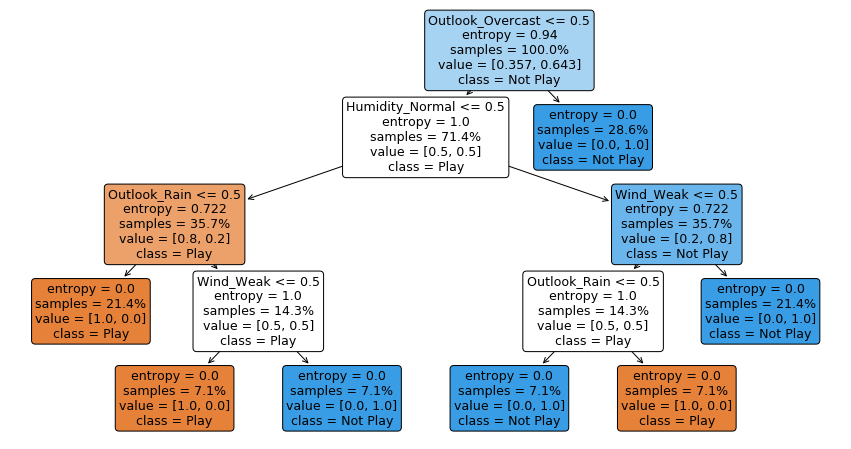

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

plt.figure(figsize=(15,8))

tree.plot_tree(clf.fit(x_dummies,y), feature_names=cols, filled=True, precision=3, proportion=True, rounded=True,
              class_names=['Play','Not Play'])
plt.show()